# The Sparks Foundation- GRIP internship #OCT2023

# TASK1 : Prediction Using Supervised Machine Learning

# Name : Vikash Rawat

# OBJECTIVE
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('http://bit.ly/w-data')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# The shape of dataset
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.size

50

In [9]:
np.ndim(df)

2

# Check the null values

In [10]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# check the description of student_score data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

In [11]:
import seaborn as sns

**Visualize the outliers through box plot method**

In [12]:
def visualize_outliers(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtypes=="float64" or dataframe[i].dtypes=="int64":
            sns.boxplot(y=i, data=df)
            plt.show()
    return "success"

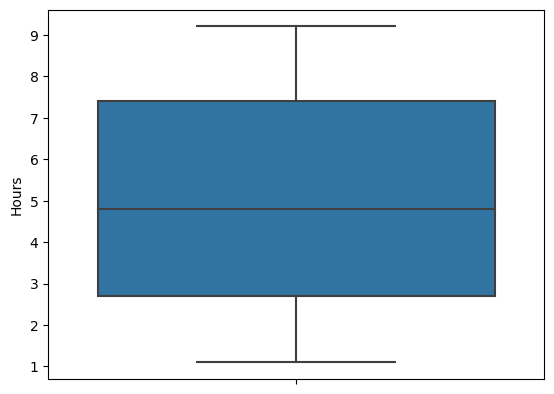

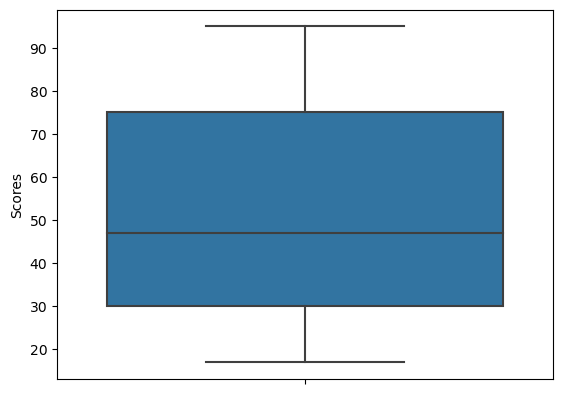

'success'

In [13]:
obj=visualize_outliers(df)
obj

# Plotting the distribution of scores

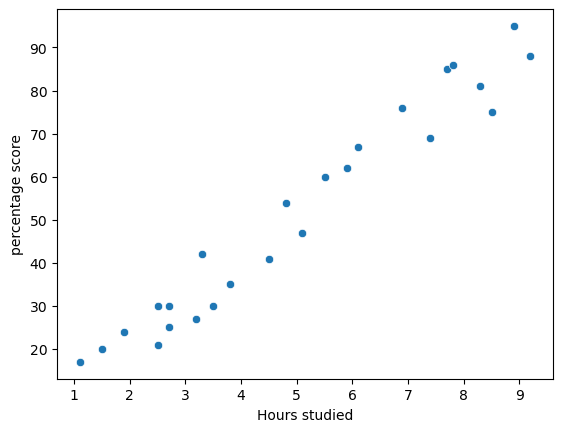

In [14]:
sns.scatterplot(x="Hours",y="Scores",data=df)
plt.title=("Hours vs scores")
plt.xlabel("Hours studied")
plt.ylabel("percentage score")
plt.show()

**i) From above observation we can conclude that there are no outliers in the data**

# Linear Regression Model

In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=42)

In [16]:
X_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [17]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [18]:
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88], dtype=int64)

In [19]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [20]:
X_train.shape

(20, 1)

In [21]:
y_train.shape

(20,)

In [22]:
y_test.shape

(5,)

In [23]:
# The data is successfully split into training and testing sets

# Building ML model

**Training the model**

In [25]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)

print("Training complete.")

Training complete.


**Training the Algorithm**

In [27]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

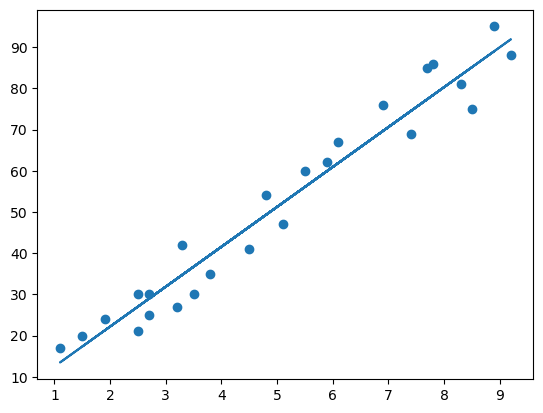

In [29]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# PREDICTIONS

In [31]:
pred_y=regressor.predict(X_test)
prediction= pd.DataFrame({"Hours": [i[0] for i in X_test], "predicted_marks": [k for k in pred_y]})
prediction

,Hours,predicted_marks
0,8.3,83.188141
1,2.5,27.032088
2,2.5,27.032088
3,6.9,69.633232
4,5.9,59.951153


# Comparing Actual and Predicted Scores

In [32]:
compare= pd.DataFrame({"Actual_score": y_test, "Predicted_score": pred_y})
compare

,Actual_score,Predicted_score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


# Model Evaluation

In [34]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

print(f"the mean absolute error is {mean_absolute_error(y_test,pred_y)}")

the mean absolute error is 3.9207511902099244


In [35]:
# r2_score

from sklearn.metrics import r2_score
print(f"the r2 score is {r2_score(y_test,pred_y)}")

the r2 score is 0.9678055545167994


# What would be the predicted score if student studies for 9.25hours/day

In [36]:
Hours_studied= 9.25
score = regressor.predict([[Hours_studied]])
print(f"The score obtained by a student{score}% if he/she studies for {Hours_studied}hours/day")

The score obtained by a student[92.38611528]% if he/she studies for 9.25hours/day
